## This is an example of how to run scan locally.

In [2]:
# load bluesky engine and best effort callback
from bluesky.run_engine import RunEngine
RE= RunEngine()
from bluesky.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()
from databroker import Broker
db = Broker.named('temp')

# Insert all metadata/data captured into db.
RE.subscribe(db.insert)

0

# Load bluesky plans and stubs plan

In [3]:
import bluesky.plans as bp
import bluesky.plan_stubs as bps

## Load all the devices in p99 dodal.

In [4]:
from dodal.beamlines.p99 import *

To connect selected device do the following.

In [5]:
sample_stage = sample_stage(connect_immediately = True)
det = andor2_point(connect_immediately = True)

To use the device without bluesky, you can simply await the async



Transient Scan ID: 1     Time: 2025-10-13 11:27:50
Persistent Unique Scan ID: '2c52db30-dc93-472c-91cc-ca1b7da08c67'
New stream: 'primary'
+-----------+------------+----------------+-------------------+--------------------+--------------------------------+
|   seq_num |       time | sample_stage-x | andor2_point-mean | andor2_point-total | andor2_point-drv-array_counter |
+-----------+------------+----------------+-------------------+--------------------+--------------------------------+
|         1 | 11:27:53.2 |          0.000 |               217 |           56930487 |                           1120 |
|         2 | 11:27:54.3 |          0.111 |               215 |           56323239 |                           1121 |
|         3 | 11:27:55.4 |          0.222 |               214 |           56137733 |                           1122 |
|         4 | 11:27:56.5 |          0.333 |               216 |           56514339 |                           1123 |
|         5 | 11:27:57.5 |       

('2c52db30-dc93-472c-91cc-ca1b7da08c67',)

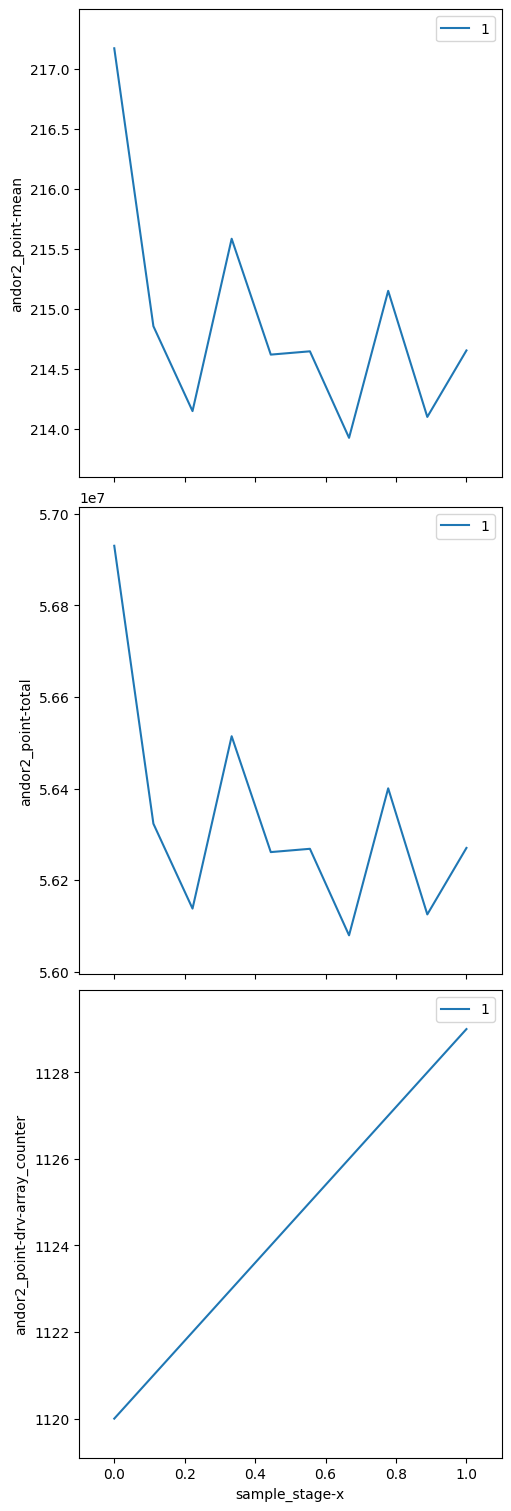

In [6]:
RE(bp.scan([det],sample_stage.x ,0,1,10),bec)

Add P99 plans

In [7]:
from sm_bluesky.beamlines.p99.plans import *

2025-10-13 11:28:03,893 - sm_bluesky - INFO - Check sample_stage-y limits.
2025-10-13 11:28:03,901 - sm_bluesky - INFO - Check sample_stage-x limits.
2025-10-13 11:28:03,966 - sm_bluesky - INFO - Ideal step size = 0.045454545454545456, velocity = 0.41666666666666663, number of data points for step axis 11
2025-10-13 11:28:03,969 - sm_bluesky - INFO - Step size = 0.045454545454545456, sample_stage-y: velocity = 0.41666666666666663, number of steps = 11.


Transient Scan ID: 2     Time: 2025-10-13 11:28:04
Persistent Unique Scan ID: '79b2ada7-62fc-4eea-99b3-4588df59764a'
2025-10-13 11:28:04,025 - sm_bluesky - INFO - Check sample_stage-x limits.
2025-10-13 11:28:04,032 - sm_bluesky - INFO - Check sample_stage-y limits.
2025-10-13 11:28:04,042 - sm_bluesky - INFO - Starting 1d fly scan with sample_stage-y: start position = 2, end position = 3.
2025-10-13 11:28:06,001 - sm_bluesky - INFO - flying motor =  sample_stage-y at speed = 0.41666666666666663
New stream: 'primary'
+-----------+-----

/dls_sw/p99/software/blueapi/scratch/py-env/p99/lib64/python3.12/site-packages/bluesky/callbacks/mpl_plotting.py:382: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  self.ax.set_xlim(self.minx, self.maxx)
/dls_sw/p99/software/blueapi/scratch/py-env/p99/lib64/python3.12/site-packages/bluesky/callbacks/mpl_plotting.py:386: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  self.ax.set_ylim(self.miny, self.maxy)


|         2 | 11:28:07.3 |          2.513 |          1.000 |               214 |           56027891 |                           1131 |
|         3 | 11:28:08.3 |          2.906 |          1.000 |               214 |           56081090 |                           1132 |
|         4 | 11:28:09.2 |          3.021 |          1.000 |               214 |           56174084 |                           1133 |
2025-10-13 11:28:09,829 - sm_bluesky - INFO - Clean up: setting motor speed to 0.6.
2025-10-13 11:28:09,833 - sm_bluesky - INFO - Starting 1d fly scan with sample_stage-y: start position = 3, end position = 2.
2025-10-13 11:28:09,852 - sm_bluesky - INFO - flying motor =  sample_stage-y at speed = 0.41666666666666663
|         5 | 11:28:10.2 |          2.921 |          1.050 |               214 |           56122490 |                           1134 |
|         6 | 11:28:11.1 |          2.547 |          1.050 |               216 |           56572481 |                           1135 |
|      

('79b2ada7-62fc-4eea-99b3-4588df59764a',)

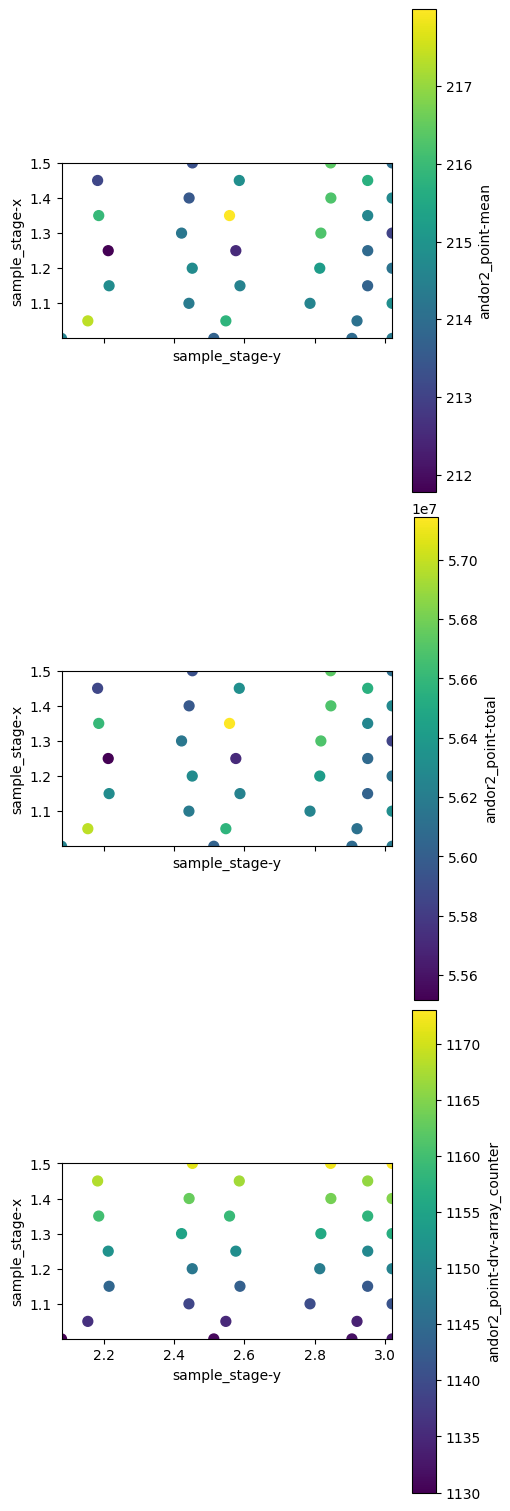

In [8]:
RE(stxm_fast([det],0.1,sample_stage.x,1.0,1.5,sample_stage.y,2,3,30),bec)

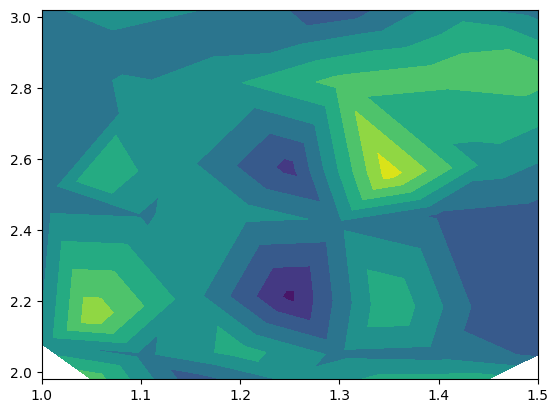

In [20]:
data= db[-1]
plt.tricontourf(data.table()["sample_stage-x"],data.table()["sample_stage-y"],data.table()["andor2_point-mean"])